# Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Dataset Info

In [2]:
store=pd.read_csv('/kaggle/input/superstore-dataset-final/Sample - Superstore.csv', index_col = 'Row ID', encoding='cp1252')

In [3]:
store.head(5)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
#shape of file
store.shape

(9994, 20)

In [5]:
#informtion about store
store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 1 to 9994
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Ship Mode      9994 non-null   object 
 4   Customer ID    9994 non-null   object 
 5   Customer Name  9994 non-null   object 
 6   Segment        9994 non-null   object 
 7   Country        9994 non-null   object 
 8   City           9994 non-null   object 
 9   State          9994 non-null   object 
 10  Postal Code    9994 non-null   int64  
 11  Region         9994 non-null   object 
 12  Product ID     9994 non-null   object 
 13  Category       9994 non-null   object 
 14  Sub-Category   9994 non-null   object 
 15  Product Name   9994 non-null   object 
 16  Sales          9994 non-null   float64
 17  Quantity       9994 non-null   int64  
 18  Discount

# Data Cleaning

In [6]:
# null values
store.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [7]:
#checking duplicate values
store.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of Row ID
1       False
2       False
3       False
4       False
5       False
        ...  
9990    False
9991    False
9992    False
9993    False
9994    False
Length: 9994, dtype: bool>

In [8]:
#display duplicate values
store[store.duplicated(keep='last')]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
3406,US-2014-150119,4/23/2014,4/27/2014,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


In [9]:
# understanding the numerical features
store.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Category Analysis

In [10]:
#adding sales by category
category = pd.DataFrame(store.groupby(['Category'])[['Sales', 'Profit', 'Quantity']].sum())
category

,Sales,Profit,Quantity
Category,,,
Furniture,741999.7953,18451.2728,8028
Office Supplies,719047.0320,122490.8008,22906
Technology,836154.0330,145454.9481,6939


In [11]:
#adding subcategories sales
sub_category = pd.DataFrame(store.groupby(['Sub-Category'])[['Sales', 'Profit']].sum())
sub_category

,Sales,Profit
Sub-Category,,
Accessories,167380.3180,41936.6357
Appliances,107532.1610,18138.0054
Art,27118.7920,6527.7870
Binders,203412.7330,30221.7633
Bookcases,114879.9963,-3472.5560
Chairs,328449.1030,26590.1663
Copiers,149528.0300,55617.8249
Envelopes,16476.4020,6964.1767
Fasteners,3024.2800,949.5182


In [12]:
#sorting sales of sub_category
s=pd.DataFrame(sub_category.sort_values('Sales',ascending=False))
print('Sales hightest to lowest')
s

Sales hightest to lowest


,Sales,Profit
Sub-Category,,
Phones,330007.0540,44515.7306
Chairs,328449.1030,26590.1663
Storage,223843.6080,21278.8264
Tables,206965.5320,-17725.4811
Binders,203412.7330,30221.7633
Machines,189238.6310,3384.7569
Accessories,167380.3180,41936.6357
Copiers,149528.0300,55617.8249
Bookcases,114879.9963,-3472.5560


In [13]:
p=pd.DataFrame(sub_category.sort_values('Profit',ascending=False))
p

,Sales,Profit
Sub-Category,,
Copiers,149528.0300,55617.8249
Phones,330007.0540,44515.7306
Accessories,167380.3180,41936.6357
Paper,78479.2060,34053.5693
Binders,203412.7330,30221.7633
Chairs,328449.1030,26590.1663
Storage,223843.6080,21278.8264
Appliances,107532.1610,18138.0054
Furnishings,91705.1640,13059.1436


In [14]:
#checking profit of segment
segment = pd.DataFrame(store.groupby(['Segment'])[['Profit']].sum())
segment

,Profit
Segment,
Consumer,134119.2092
Corporate,91979.1340
Home Office,60298.6785


<Axes: title={'center': 'Top selling Subcategory'}, xlabel='Sub-Category'>

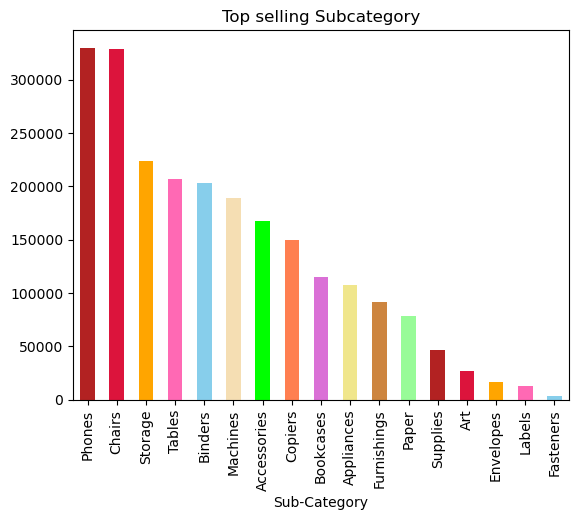

In [15]:
#Top selling Subcategory
colors=['firebrick','crimson' ,'orange', 'hotpink', 'skyblue', 'wheat', 'lime', 'coral', 'orchid', 'khaki', 'peru', 'palegreen']
store.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).plot.bar(color=colors,title='Top selling Subcategory')

<Axes: title={'center': 'Top ten profitable cities'}, ylabel='Product Name'>

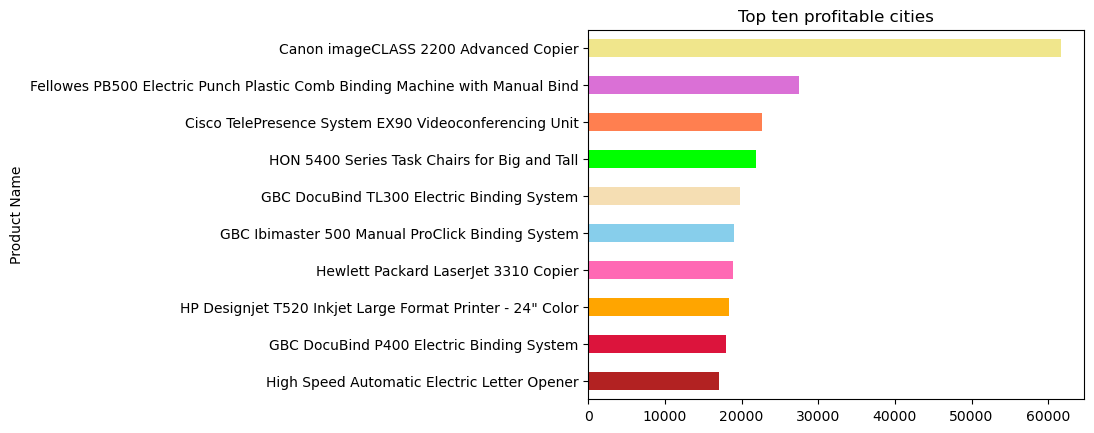

In [16]:
#Top selling products
colors=['firebrick','crimson' ,'orange', 'hotpink', 'skyblue', 'wheat', 'lime', 'coral', 'orchid', 'khaki', 'peru', 'palegreen']
store.groupby('Product Name')['Sales'].sum().sort_values(ascending=True).tail(10).plot.barh(color=colors,title='Top ten profitable cities')

# Geographical analysis

<Axes: title={'center': 'Sales by Region'}, xlabel='Region'>

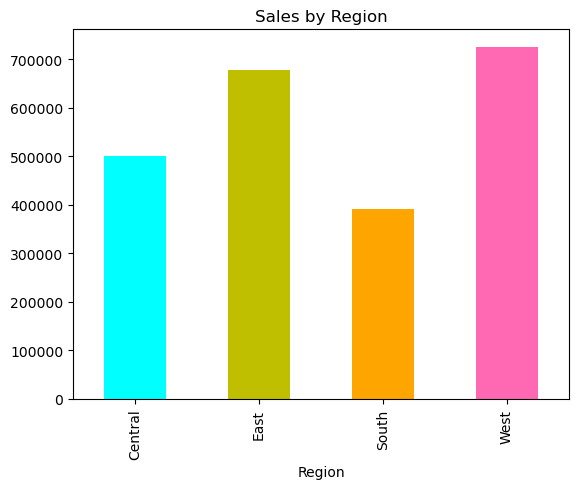

In [17]:
#checking sales by region
colors=['cyan','y' ,'orange', 'hotpink']
store.groupby('Region')['Sales'].sum().plot.bar(color=colors,title='Sales by Region')

In [18]:
#checking profit by region
region = pd.DataFrame(store.groupby(['Region'])['Profit'].sum().reset_index())
region

,Region,Profit
0,Central,39706.3625
1,East,91522.7800
2,South,46749.4303
3,West,108418.4489


In [19]:
#checking profit by cities
c = pd.DataFrame(store.groupby(['State'])['Profit'].sum().reset_index()).sort_values('Profit',ascending=False)
c

,State,Profit
3,California,76381.3871
30,New York,74038.5486
45,Washington,33402.6517
20,Michigan,24463.1876
44,Virginia,18597.9504
12,Indiana,18382.9363
9,Georgia,16250.0433
15,Kentucky,11199.6966
21,Minnesota,10823.1874
6,Delaware,9977.3748


<Axes: title={'center': 'Top ten profitable cities'}, ylabel='State'>

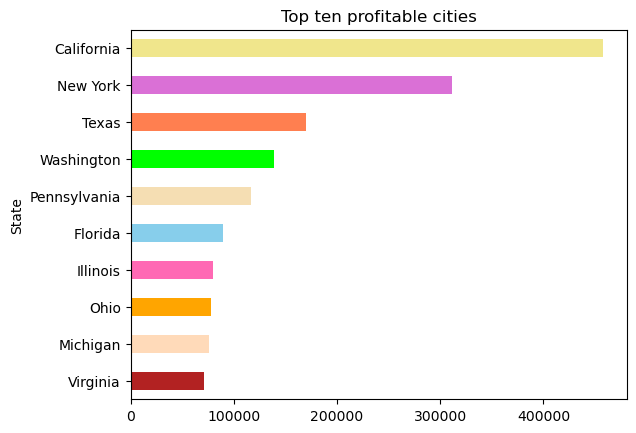

In [20]:
colors=['firebrick','peachpuff' ,'orange', 'hotpink', 'skyblue', 'wheat', 'lime', 'coral', 'orchid', 'khaki', 'peru', 'palegreen']
store.groupby('State')['Sales'].sum().sort_values(ascending=True).tail(10).plot.barh(color=colors,title='Top ten profitable cities')

In [21]:
print("least profitable cities")
c.tail(10)

least profitable cities


,State,Profit
35,Oregon,-1190.4705
8,Florida,-3399.3017
1,Arizona,-3427.9246
40,Tennessee,-5341.6936
4,Colorado,-6527.8579
31,North Carolina,-7490.9122
11,Illinois,-12607.8870
36,Pennsylvania,-15559.9603
33,Ohio,-16971.3766
41,Texas,-25729.3563


In [22]:
pd.DataFrame(store.groupby(['City'])[['Category','Sub-Category']].sum().reset_index())

,City,Category,Sub-Category
0,Aberdeen,Office Supplies,Supplies
1,Abilene,Office Supplies,Appliances
2,Akron,Office SuppliesFurnitureOffice SuppliesFurnitu...,PaperTablesStorageFurnishingsPaperArtBindersBi...
3,Albuquerque,TechnologyOffice SuppliesOffice SuppliesTechno...,AccessoriesBindersStoragePhonesAccessoriesPape...
4,Alexandria,Office SuppliesFurnitureOffice SuppliesOffice ...,StorageFurnishingsStoragePaperPaperPhonesFurni...
...,...,...,...
526,Woonsocket,FurnitureOffice SuppliesOffice SuppliesOffice ...,FurnishingsStoragePaperBinders
527,Yonkers,FurnitureOffice SuppliesOffice SuppliesTechnol...,TablesPaperStorageMachinesAccessoriesBindersBi...
528,York,FurnitureOffice SuppliesOffice SuppliesOffice ...,ChairsBindersStorageBindersPaper
529,Yucaipa,Office Supplies,Art
